## Background / Motivation

##### Solution

We were motivated to work on this problem because all of us enjoy music, but we all have slightly different tastes. Because everyone's taste in music varies, we wondered what songs are generally likeable, and thus become popular. 

## Problem statement 

What factors contribute to a song’s popularity, and can those factors be used in a regression statement to predict how well a song performs on the top charts? The way that we would assess model accuracy is through RMSE and R^2, and we have implemented stepwise selection, ridge regression, transformations, and interactions to improve our model. 

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

##### Solution

We used a dataset that was given to us last quarter, called "spotify_data.csv". We originally used a Kaggle dataset, but that did not have sufficient data to split into train and test datasets. The new dataset is much more convenient for our EDA questions and to split datasets because it contains music all the way up to 2022, which is how we split up our two datasets. Our dataset contains  the following variables, a mix of both quantitative and qualitative: artist_followers, genres, artist_name, artist_popularity, track_name, track_popularity, duration_ms, explicit, release_year, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature. We split our dataset up into the train & test data by release year. The train data was all of the songs from 1923 - 2020 and our test data was all of the songs released in the year 2021 (most recent data in dataset)

## Stakeholders

##### Solution

Our stakeholders include anyone who is interested in boosting their music and making it more popular. This includes artists and their producers. Many artists create music for the intention of it becoming popular, and our conclusions could help them determine what ‘vibe’ their song should be. Producers are in charge of determining the melody, acousticness, and danceability of songs, and could adjust those factors accordingly to how they impact the song’s popularity. 


## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

If the tables in this section take too much space, you may put them in the appendix, and just mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your final model(s).

##### Solution

**Data Quality:** We used the .describe() function for the spotify data set, which allowed us to determine how good the variables would be, how many there were, what the distribution was of each of them, etc. Moreover, we used the .value_counts() function for categorical variables to help find somewhat of a distribution for them. We found that the spotify data set we were using ended up being quality.

.describe() table (numerical variables):

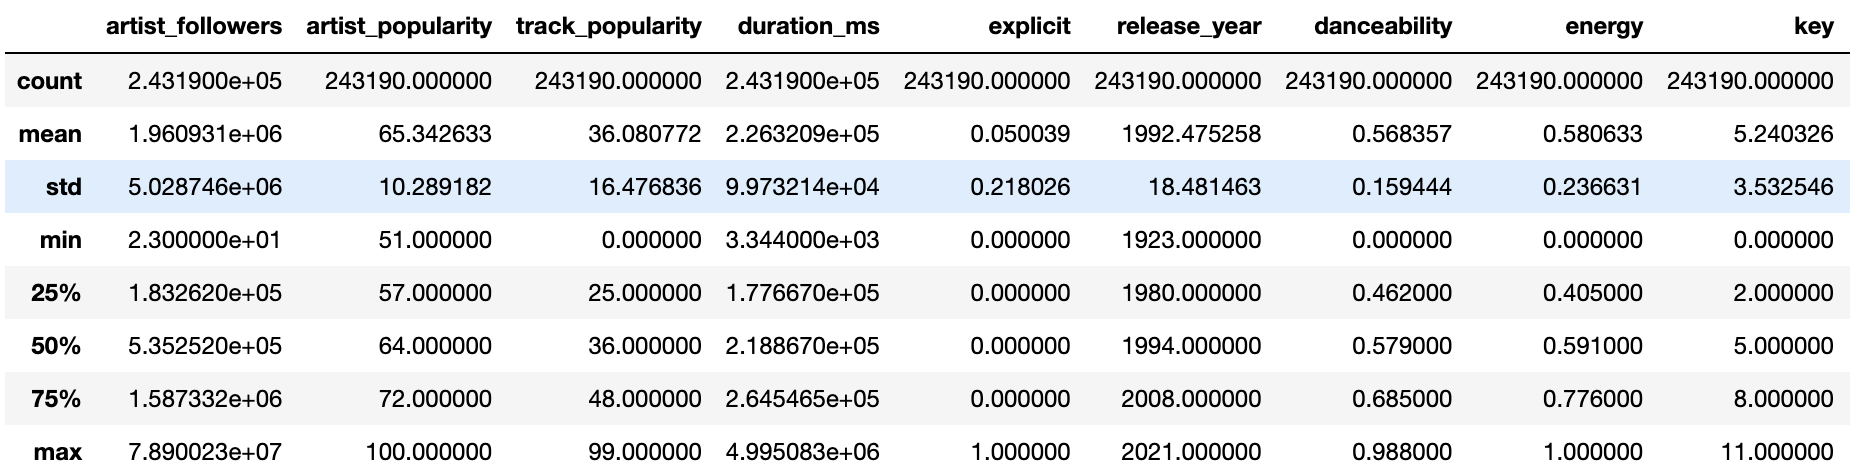

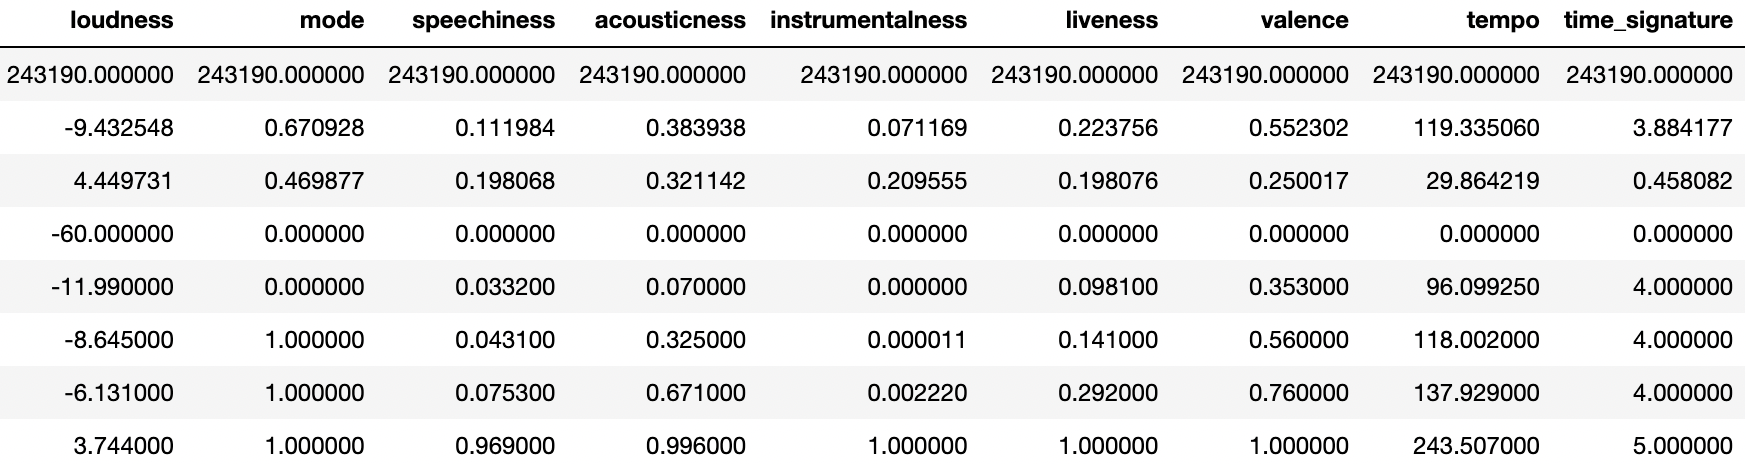

.value_counts (categorical variables): 

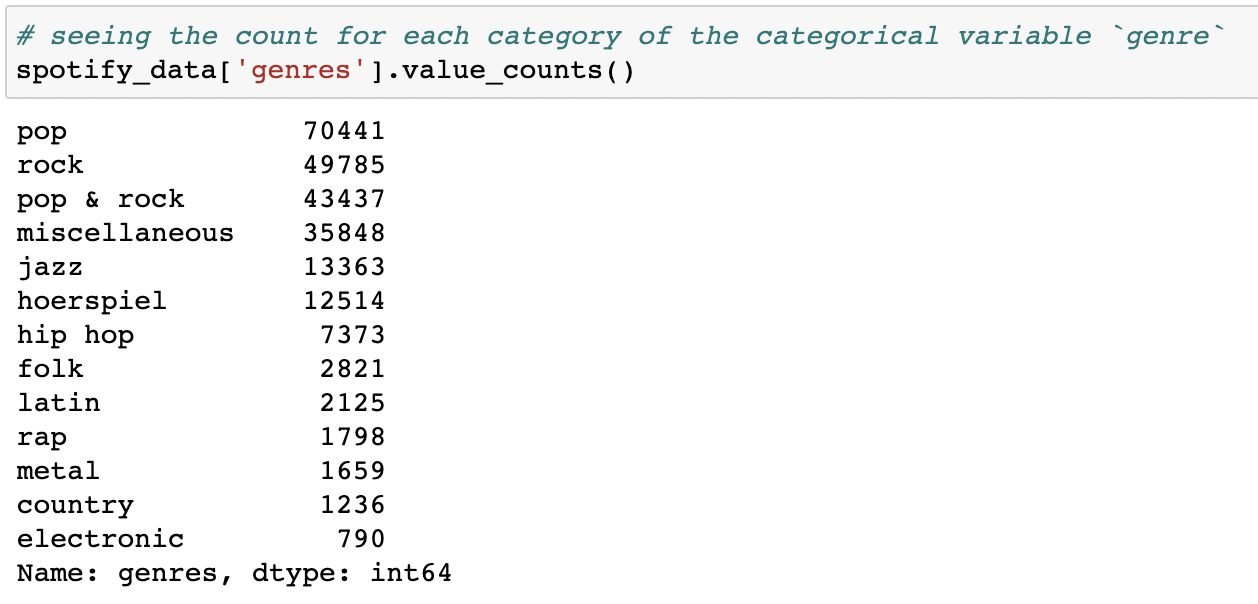

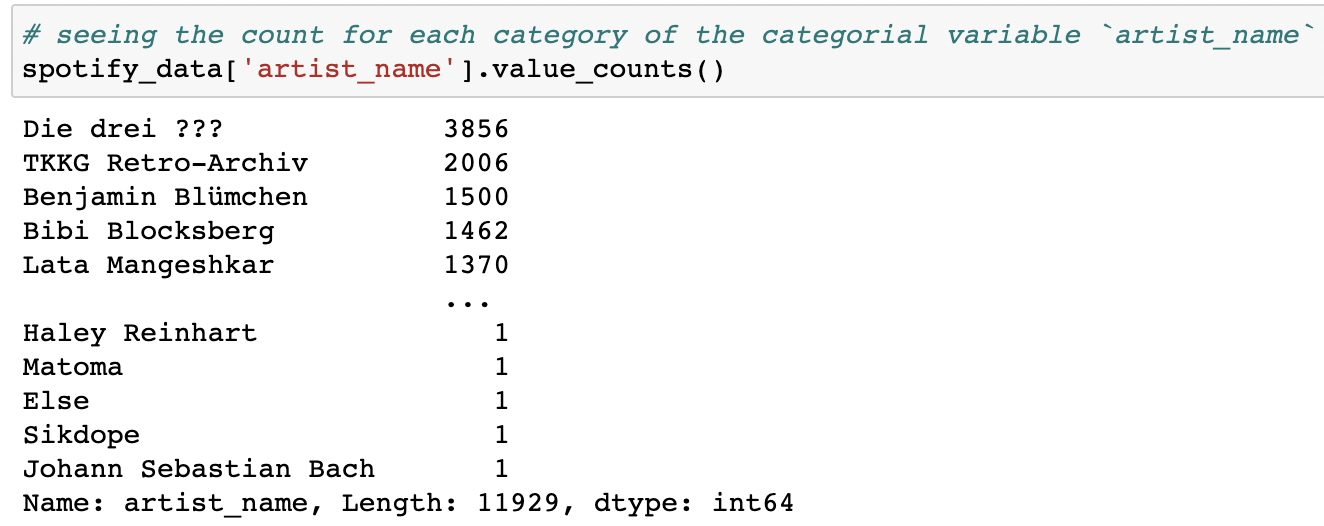

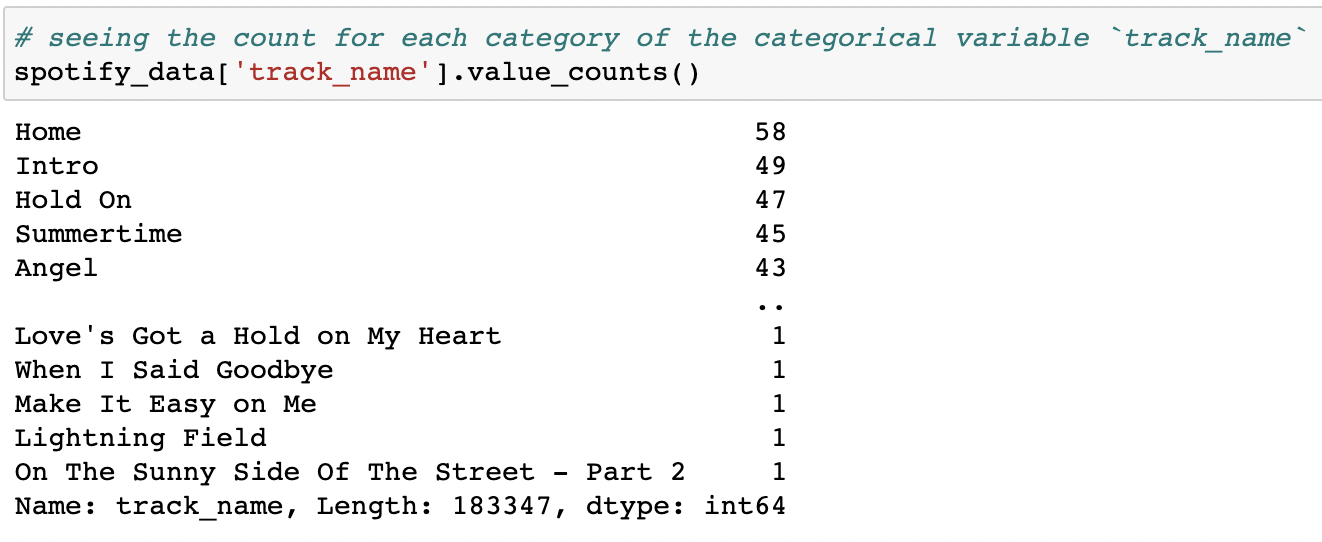

**Data cleaning:** Using the .is.null() and .is.null().sum() functions, we figured out that there was no null values in our data set, which means that we did not need to do much data cleaning to remove NA values.

**Data preparation:** The only data preparation we really did early on was standardizing predictors for lasso/ridge that we were most likely going to use later on. The code for this part of the process is in our code template.

## Exploratory data analysis

##### Solution

In order to get some clarity on our variables and determine how best to create and improve our model, we conducted various analyses to examine the relationship between all of the predictors and our response variable (track_popularity). 

First, we created a heat map that showed the correlation between all of the different variables. By creating this visualization we were able to come across the following insights: 
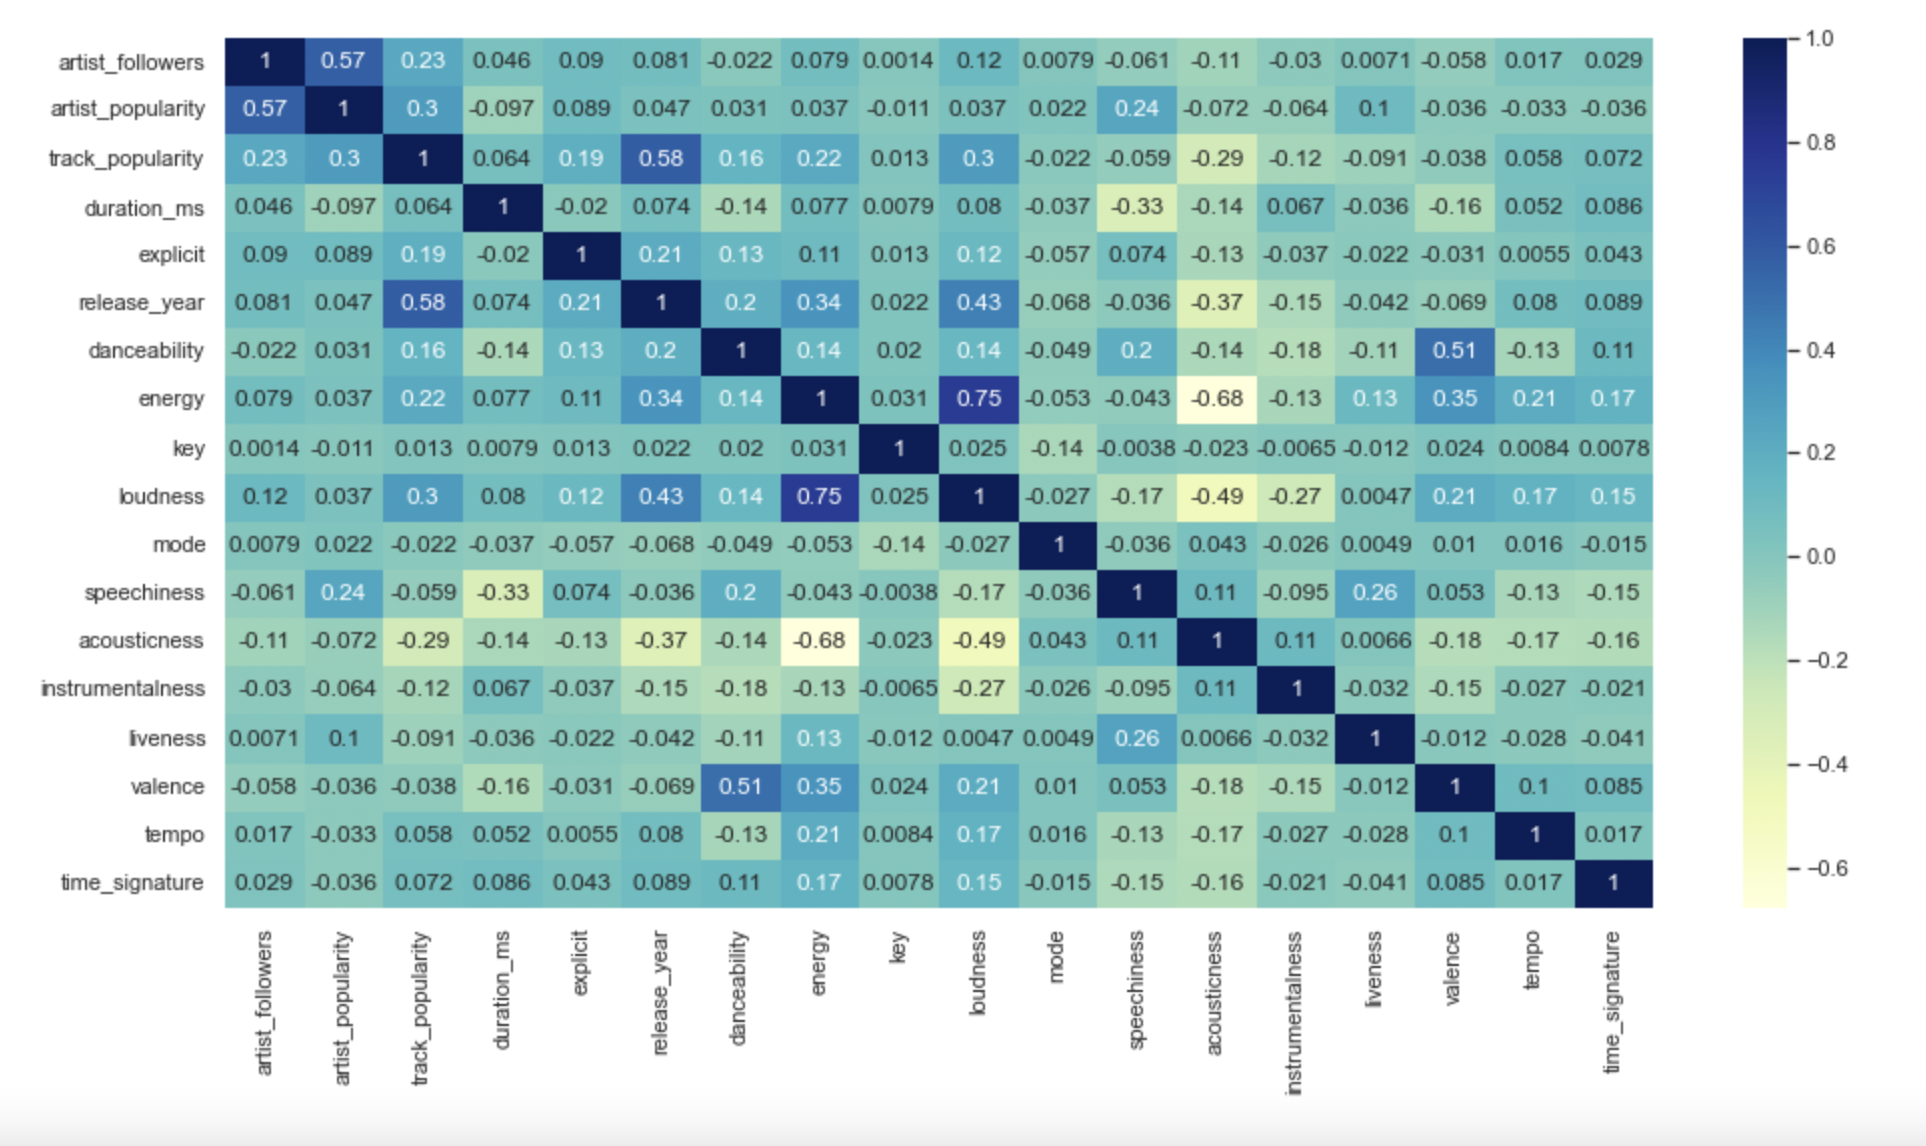
- Track popularity has the highest correlation with release year (the year the observation was released). The correlation is ~0.58
- Out of the remaining continuous/numerical variables, track popularity has the highest correlation with artist popularity, loudness, and energy. Although these variables had the highest correlation, the magnitude of the coefficients was still very low (between 0.22 and 0.3). However relative to the other variables this seemed to be a larger correlation. 

To study the relationships of track popularity with release year, artist popularity, loudness, and energy even further, we decided to create separate scatter plots with each of these variables: 
- From the graph of energy vs. track popularity above, it is clear that there does not seem to be an evident relationship between the two variables. Rather, the sheer amount of data points show a range of track popularity values for each energy value. 
- The graphs of loudness vs. track popularity and artist popularity vs. track popularity led us to draw similar conclusions. As you can see from the graphs above, track popularity takes on a range of values for each value of both loudness and artist popularity. However, there does seem to be a slight upward trend in both of them. 
- Lastly, in the graph of release year vs. track popularity there does appear to be a slightly clearer relationship. It seems that as the release year increases, track popularity increases as well. This makes sense given that newer songs are more likely to be listened to on a platform such as Spotify. 

Overall, there did seem to be a very strong relationship between any of the variables and our response. However, we were still able to determine which ones had the strongest correlation to track popularity in comparison to the rest, and get a little insight into what transformations would be worth trying. 


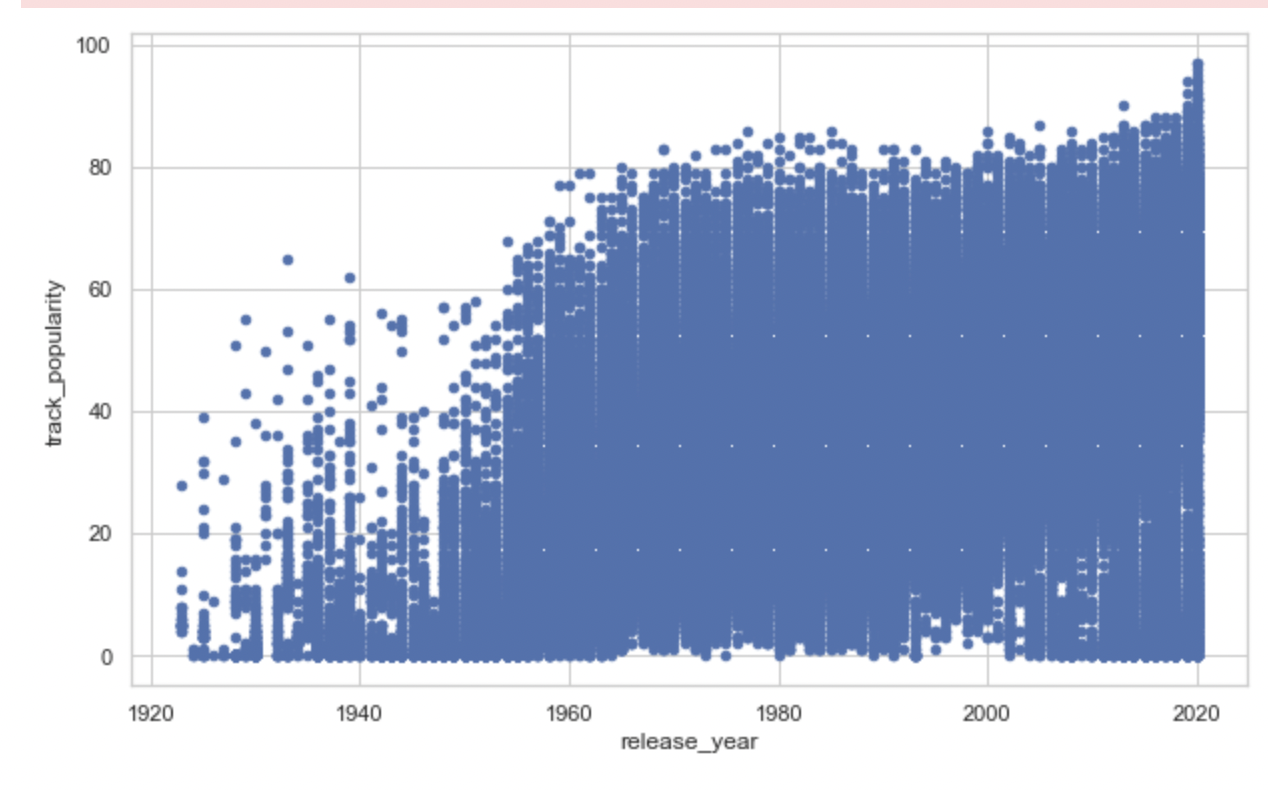

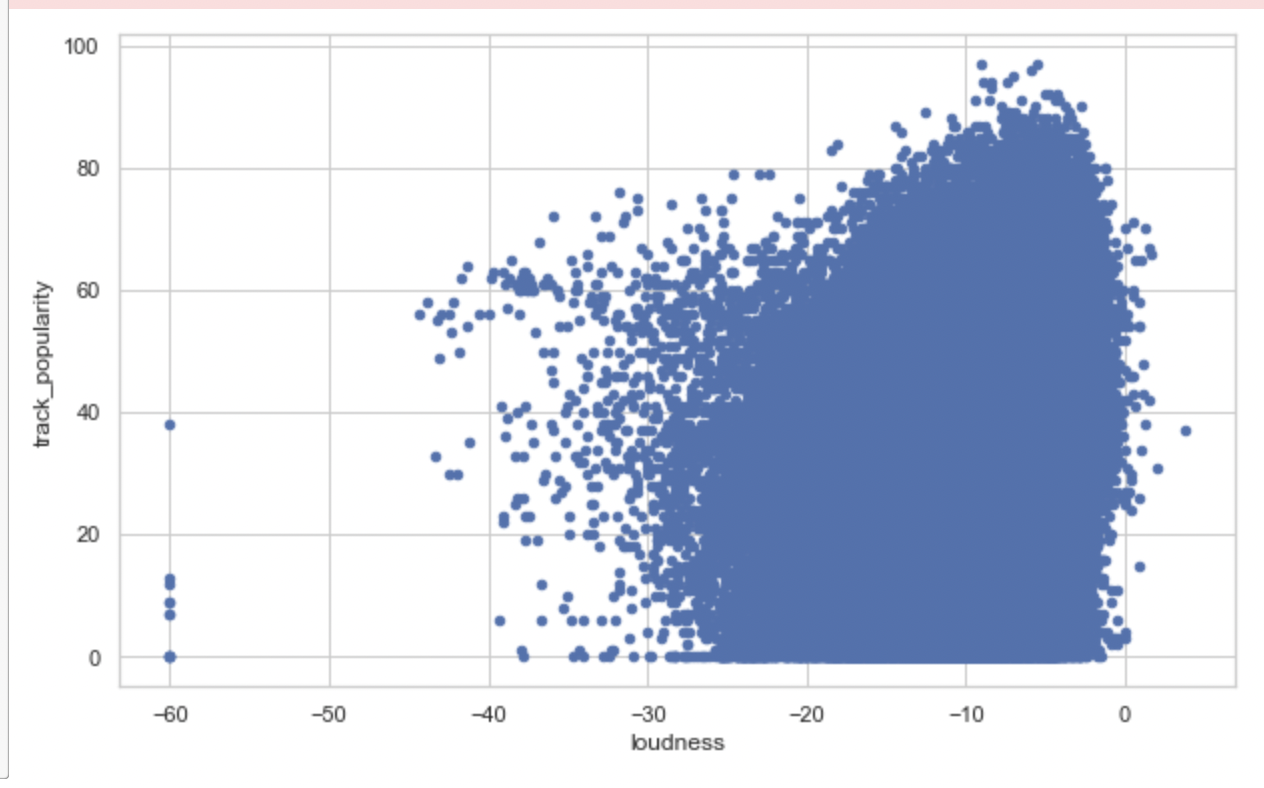

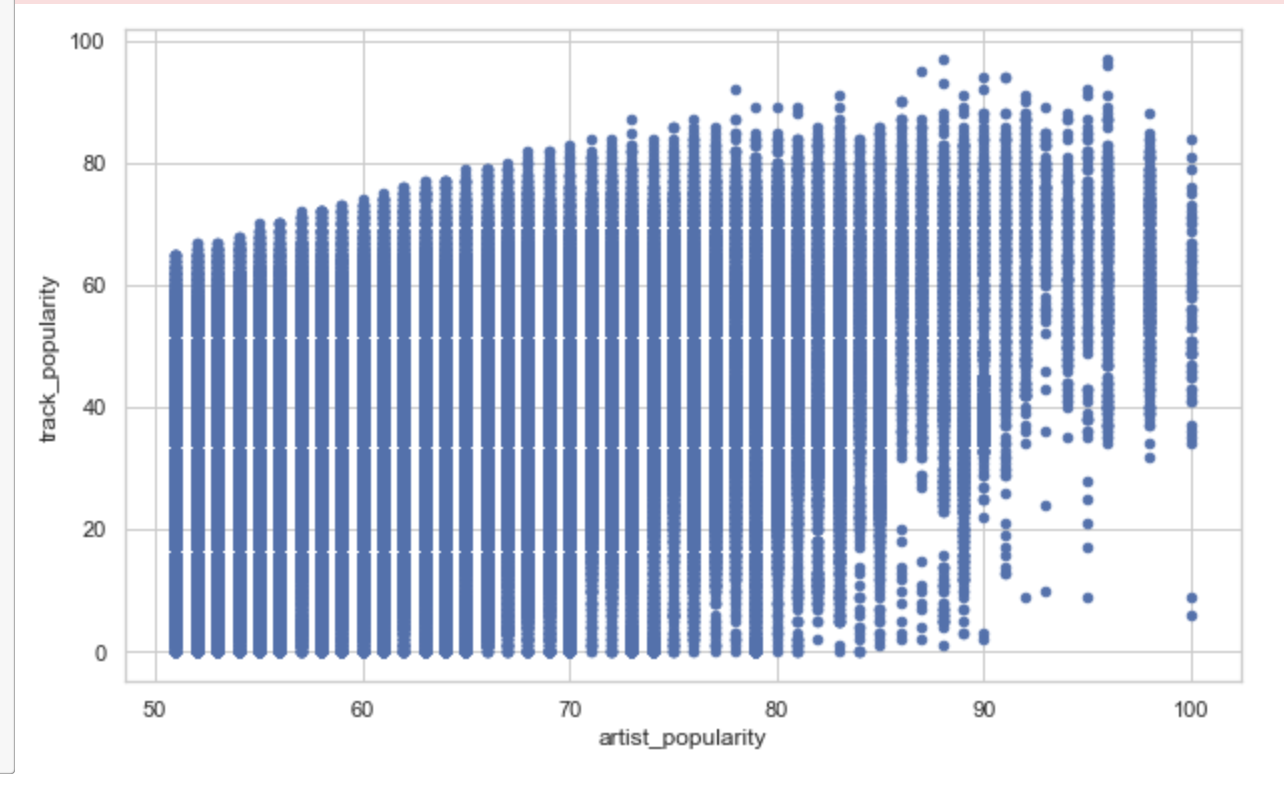

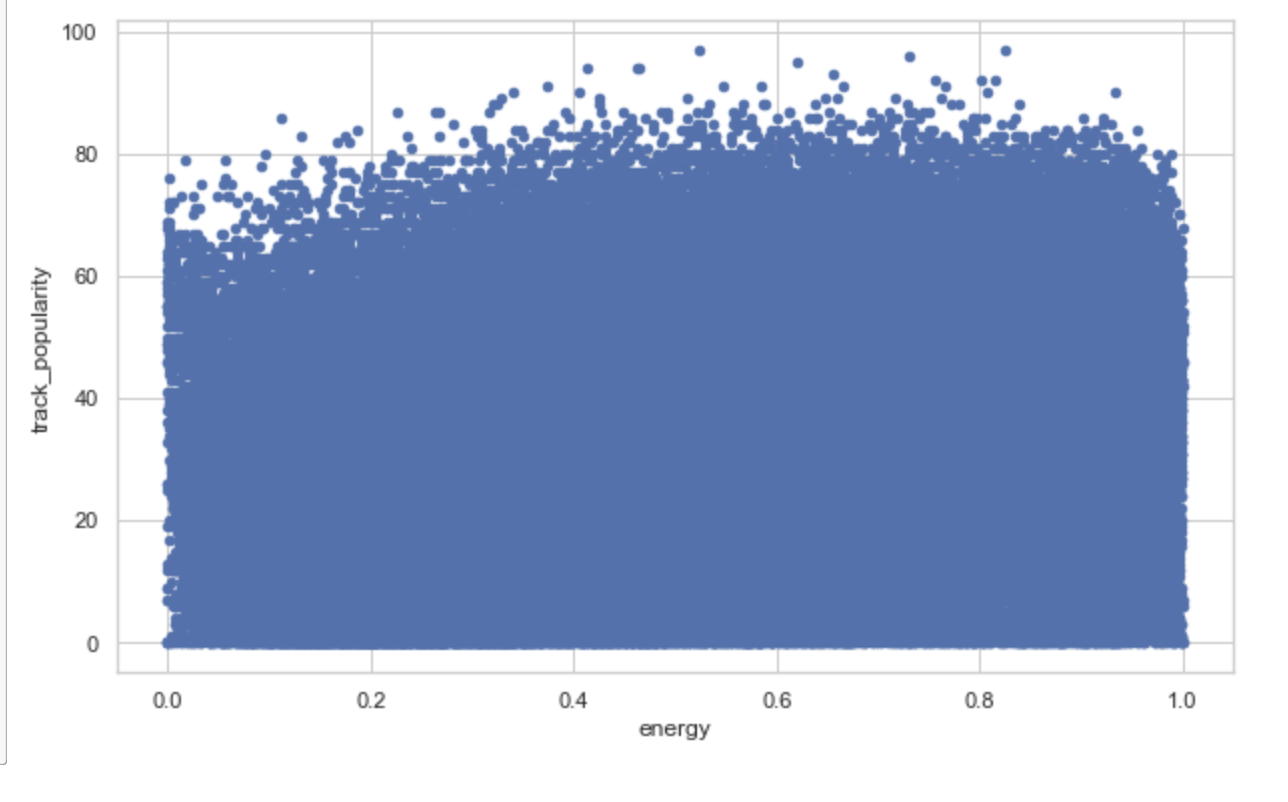

## Approach

What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? Did the very first model you tried work? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

##### Solution

We decided to use a linear model for our project, with our response variable being `track_popularity`. We did some intial EDA, then went through many iterations of the multiple linear regression and tried to come up with the best final model to predict `track_popularity` based on the model having the highest R^2 possible and the lowest AIC and BIC levels possible. We used several methods to attempt to try to get the best MLR model. 

First, we created a model with all of the quantitative predictors as the predictor variables attempting to predict `track_popularity`. This model got us an R^2 value of 43.3% and AIC and BIC values of 1.891 x 10^6 - we knew that we could try many methods to create a more accurate and better model than this. Then, we checked for multicollinearity by utilizing the VIF. Then, we utilized forward selection to help us try to understand how many variables should be in the final model. Forward selection was an issue for us because we did not end up finding it particularly useful.

Therefore, we decided to use variable interactions and transformations to try to increase our model's accuracy. Finally, we came up with a final MLR model that got us an R^2 value of 47.4% and AIC and BIC values of 1.874 x 10^6 and 1.879 x 10^6, respectively. 

Our problem did not already have solutions posted anywhere else that we came across; therefore, we did all of this on our own without the guidance of an online solution. Therefore, we did not build upon any solutions or have any solutions to compare our final solution to.

## Developing the model

##### Solution

We began by creating an original/basline MLR model that consisted of predicting our response variable `track_popularity` by utilizing all of the numerical variables in the dataset as our predictor variables in the MLR model. This gave us a place to start (starting R^2, AIC, and BIC values to work from), but we knew that we could make a better model by implementing the methods that we were taught in class.

Before continuing with our model, we wanted to check for collinearity among our predictors. We felt as though checking for collinearity would be a good way to filter for insignificant predictors, since it is possible that in music some audio attributes are associated with others. To measure collinearity/multicollinearity, we computed the VIF values for all of the different predictors. Upon doing this, however, we found that all of the predictors had VIF values <  5. Thus, we concluded that collinearity was not a cause for concern within our predictors. 

Given that some features of a song might affect the other qualities, we wanted to make sure that our model included the proper interaction terms. We also felt as though this would potentially help our model to fit better, instead of just using all of the predictors on their own. One thing that we considered was the genre of a song and how the audio attributes might vary depending on a specific genre. For example, the danceability, energy, and instrumentalness of a song in the dance-pop genre might be very different from that of a jazz or country song. To account for this we decided to include interaction terms between genre and all of the significant continuous variables. After including solely the interaction terms to our model, we saw that it significantly improved. The R^2 increased from 0.433 to 0.464, which was an indication that the interaction terms were a necessary choice. 

We then examined whether there are any transformations we can do. Since the residual plots violate the assumption of linearity and constant variance assumption, we hypothesize that there may be transformations that can make our models more accurate in predicting the song popularity. After examining the relations between various factors, we have noticed that the violations of the two assumptions are mostly due to one subset of the data: the pop genre, and when the predictive variable is the year of the song’s release. Initially, we used quadratic transformations on the year_released variable. However, that failed to increase the R-squared of the model, and is thus inefficient at making the model more accurate. A second attempt was made to logarithmize the predictive variable, also to no avail. 

Since we found that individually applying transformations to different models did not work, likely because a majority of the time there was not a clear relationship between the variables as shown by the EDA that we conducted. Through trial and error, we looked at trying to add transformations to the terms that were interacted with genre. We found that adding interaction terms to the following variables yielded the greatest R^2 value of 0.474: (release_year*genres+loudness*genres+artist_popularity*genres+energy*genres+explicit*genres+danceability*genres+time_signature*genres)**2

We noticed that the number of predictors that we were using was pretty high, thus we figured that it may be helpful to find a subset of these predictors to see if it would improve our model further. To do this, we tried forward stepwise selection. The resulting model with the highest BIC and AIC had 14 predictors. These predictors were the same as the original predictors that we had but excluded time signature. We decided to remove the interaction term of genre*time_signature from our current best model, then printed the model summary and calculated the test RMSE again to see whether there were any improvements. However, we found that both the R^2 and the RMSE remained the same, and thus finding the best predictors did not help to increase the fit of our model.

After our model was completed and it did not seem as though many more improvements could be made, we implemented it on our test dataset. As a reminder, we split up our original dataset into test and train by putting the observations with a release year of 2021 in our test data and using all of the others as our train data. We used our model to make predictions for the track popularity on our test data and then created a scatterplot showing the actual track popularity against the predicted track popularity. From this plot, we can see that the predictions were not very accurate, specifically for songs where the actual popularity is very low (like between 0 and 20). Our model predicted for such observations to actually have a much higher track popularity. To get a numerical representation of how our model did, we calculated the test RMSE, which was approximately 34. We interpreted this number to be very high, given that track popularity is on a scale of 0-100. 

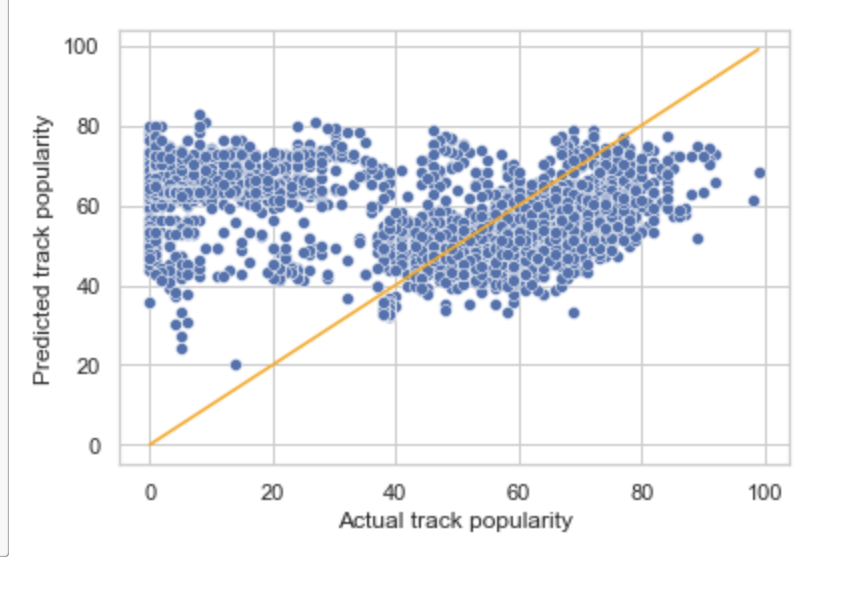

### Final Model Equation
track_popularity = -1145.6416 +2107.3636*genres[T.electronic]+genres[T.folk]*1807.174086+genres[T.hip_hop]*132.233926+genres[T.hoerspiel]*(-1719.458128)+genres[T.jazz]*(-449.465520)+genres[T.latin]*1261.120869+genres[T.metal]*-180.396649+genres[T.miscellaneous]*-246.044663+genres[T.pop]*-440.219310+genres[T.pop & rock]*770.111342+genres[T.rap]*-827.063863+genres[T.rock]*-325.668796+release_year*0.551276+release_year:genres[T.electronic]*-1.043467+release_year:genres[T.folk]*-0.867049+release_year:genres[T.hip hop]*-0.041297+release_year:genres[T.hoerspiel]*0.887888+release_year:genres[T.jazz]*0.274437+release_year:genres[T.latin]*-0.602001+release_year:genres[T.metal]*0.148085+release_year:genres[T.miscellaneous]*0.149718+release_year:genres[T.pop]*0.266124+release_year:genres[T.pop & rock]*-0.365017+release_year:genres[T.rap]*0.446495+release_year:genres[T.rock]*0.188214+loudness*-67.594515+loudness:genres[T.electronic]*61.476503+loudness:genres[T.folk]*57.640257+loudness:genres[T.hip hop]*34.308647+loudness:genres[T.hoerspiel]*77.945472+loudness:genres[T.jazz]*50.533699+loudness:genres[T.latin]*64.242862+loudness:genres[T.metal]*-288.078462+loudness:genres[T.miscellaneous]*56.500782+loudness:genres[T.pop]*14.693388+loudness:genres[T.pop & rock]*37.315969+loudness:genres[T.rap]*-34.366256+loudness:genres[T.rock]*10.396386+artist_popularity*-21.265151+artist_popularity:genres[T.electronic]*4.770493+artist_popularity:genres[T.folk]*-16.223549+artist_popularity:genres[T.hip hop]*-7.558005+artist_popularity:genres[T.hoerspiel]*58.755903+artist_popularity:genres[T.jazz]*23.767929+artist_popularity:genres[T.latin]*-1.552181+artist_popularity:genres[T.metal]*-18.845021+artist_popularity:genres[T.miscellaneous]*20.704455+artist_popularity:genres[T.pop]*14.522959+artist_popularity:genres[T.pop & rock]*8.217545+energy:genres[T.rap]*719.307951+energy:genres[T.rock]*-567.828047+explicit*-301.282073+explicit:genres[T.electronic]*137.046697+explicit:genres[T.folk]*-0.082354+explicit:genres[T.hip hop]*607.485338+explicit:genres[T.hoerspiel]*0.003409+explicit:genres[T.jazz]*3.345911+explicit:genres[T.latin]*-2153.421557+explicit:genres[T.metal]*1329.322021+explicit:genres[T.miscellaneous]*11.209091+explicit:genres[T.pop]*389.924382+explicit:genres[T.pop & rock]*12.221142+explicit:genres[T.rap]*-671.685537+explicit:genres[T.rock]*-8.091606+danceability*128.604588+danceability:genres[T.electronic]*-475.336331+danceability:genres[T.folk]*383.089602+danceability:genres[T.hip hop]*284.163885+danceability:genres[T.hoerspiel]*234.314274+danceability:genres[T.jazz]*21.565875+danceability:genres[T.latin]*322.063969+danceability:genres[T.metal]*-1551.548346+danceability:genres[T.miscellaneous]*-112.061196+danceability:genres[T.pop]*-624.755877+danceability:genres[T.pop & rock]*-57.888121+danceability:genres[T.rap]*486.889452
danceability:genres[T.rock]*-740.214553+time_signature*47.423222+time_signature:genres[T.electronic]*-500.885956+time_signature:genres[T.folk]*-112.512611+time_signature:genres[T.hip hop]*138.248461+time_signature:genres[T.hoerspiel]*-68.300523+time_signature:genres[T.jazz]*-2.070808+time_signature:genres[T.latin]*-66.337172+time_signature:genres[T.metal]*0.219318+time_signature:genres[T.miscellaneous]*-12.742426+time_signature:genres[T.pop]*-43.740839+time_signature:genres[T.pop & rock]*-46.574484+time_signature:genres[T.rap]*-339.584860+time_signature:genres[T.rock]*-28.504495+release_year:loudness*0.032442+release_year:loudness:genres[T.electronic]*-0.029162+release_year:loudness:genres[T.folk]*-0.026560+release_year:loudness:genres[T.hip hop]*-0.015406+release_year:loudness:genres[T.hoerspiel]*-0.038054+release_year:loudness:genres[T.jazz]*-0.023355+release_year:loudness:genres[T.latin]*-0.030585+release_year:loudness:genres[T.metal]*0.148906+release_year:loudness:genres[T.miscellaneous]*-0.027275+release_year:loudness:genres[T.pop]*-0.005596+release_year:loudness:genres[T.pop & rock]*-0.016637+release_year:loudness:genres[T.rap]*0.019065+release_year:loudness:genres[T.rock]*-0.004159+release_year:artist_popularity*0.011148+release_year:artist_popularity:genres[T.electronic]*-0.002482+release_year:artist_popularity:genres[T.folk]*0.007618+release_year:artist_popularity:genres[T.hip hop]*0.003386+release_year:artist_popularity:genres[T.hoerspiel]*-0.029799+release_year:artist_popularity:genres[T.jazz]*-0.012370+release_year:artist_popularity:genres[T.latin]*0.000422+release_year:artist_popularity:genres[T.metal]*0.008934+release_year:artist_popularity:genres[T.miscellaneous]*-0.010640+release_year:artist_popularity:genres[T.pop]*-0.00759+release_year:artist_popularity:genres[T.pop & rock]*-0.004220+release_year:artist_popularity:genres[T.rap]*-0.005375+release_year:artist_popularity:genres[T.rock]*-0.012559+release_year:energy*-0.594579+release_year:energy:genres[T.electronic]*-0.854274+release_year:energy:genres[T.folk]*0.536032+release_year:energy:genres[T.hip hop]*0.062846+release_year:energy:genres[T.hoerspiel]*0.865294+release_year:energy:genres[T.jazz]*0.523682+release_year:energy:genres[T.latin]*0.652415+release_year:energy:genres[T.metal]*-0.342411+release_year:energy:genres[T.miscellaneous]*0.420726+release_year:energy:genres[T.pop]*-0.127257release_year:energy:genres[T.pop & rock]*0.377480+release_year:energy:genres[T.rap]*-0.384021+release_year:energy:genres[T.rock]*0.258000+release_year:explicit*0.190129+release_year:explicit:genres[T.electronic]*-1.132392+release_year:explicit:genres[T.folk]*-0.001985+release_year:explicit:genres[T.hip_hop]*-0.351985+release_year:explicit:genres[T.hoerspiel]*-0.000240+release_year:explicit:genres[T.jazz]*-0.087566+release_year:explicit:genres[T.latin]*-0.932271+release_year:explicit:genres[T.metal]*-0.698415+release_year:explicit:genres[T.miscellaneous]*-0.034040+release_year:explicit:genres[T.pop]*-0.226565+release_year:explicit:genres[T.pop&rock]*-0.051231+release_year:explicit:genres[T.rap]*0.283782+release_year:explicit:genres[T.rock]*-0.048680+release_year:danceability*-0.052262+release_year:danceability:genres[T.electronic]*0.233605+release_year:danceability:genres[T.folk]*-0.220978+release_year:danceability:genres[T.hip hop]*-0.135116+release_year:danceability:genres[T.hoerspiel]*-0.139631+release_year:danceability:genres[T.jazz]*-0.018838+release_year:danceability:genres[T.latin]*-0.179423+release_year:danceability:genres[T.metal]*0.765950+release_year:danceability:genres[T.miscellaneous]*0.048854+release_year:danceability:genres[T.pop]*0.282564+release_year:danceability:genres[T.pop & rock]*0.021017+release_year:danceability:genres[T.rap]*-0.247164+release_year:danceability:genres[T.rock]*0.355098+release_year:time_signature*-0.020593+release_year:time_signature:genres[T.electronic]*0.259306+release_year:time_signature:genres[T.folk]*0.056752+release_year:time_signature:genres[T.hip hop]*-0.071227+release_year:time_signature:genres[T.hoerspiel]*0.031457+release_year:time_signature:genres[T.jazz]*-0.002360+release_year:time_signature:genres[T.latin]*0.032134+release_year:time_signature:genres[T.metal]*-0.007922+release_year:time_signature:genres[T.miscellaneous]*0.002962+release_year:time_signature:genres[T.pop]*0.014931+release_year:time_signature:genres[T.pop & rock]*0.021335+release_year:time_signature:genres[T.rap]*0.166010+release_year:time_signature:genres[T.rock]*0.011360+loudness:artist_popularity*0.038815+loudness:artist_popularity:genres[T.electronic]*-0.048890+loudness:artist_popularity:genres[T.folk]*-0.081912+loudness:artist_popularity:genres[T.hip hop]*-0.048108+loudness:artist_popularity:genres[T.hoerspiel]*-0.030336+loudness:artist_popularity:genres[T.jazz]*-0.045593+loudness:artist_popularity:genres[T.latin]*-0.039926+loudness:artist_popularity:genres[T.metal]*-0.130600+loudness:artist_popularity:genres[T.miscellaneous]*-0.032155+loudness:artist_popularity:genres[T.pop]*-0.030530+loudness:artist_popularity:genres[T.pop & rock]*-0.049528+loudness:artist_popularity:genres[T.rap]*-0.041918+loudness:artist_popularity:genres[T.rock]*-0.023439+loudness:energy*0.835262+loudness:energy:genres[T.electronic]*-0.190242+loudness:energy:genres[T.folk]*0.279834+loudness:energy:genres[T.hip hop]*-0.723734+loudness:energy:genres[T.hoerspiel]*-0.961166+loudness:energy:genres[T.jazz]*-1.013529+loudness:energy:genres[T.latin]*-1.127414+loudness:energy:genres[T.metal]*-0.320539+loudness:energy:genres[T.miscellaneous]*-0.775520+loudness:energy:genres[T.pop]*0.151548+loudness:energy:genres[T.pop & rock]*-0.504956+loudness:energy:genres[T.rap]*0.029296+loudness:energy:genres[T.rock]*-0.439411+loudness:explicit*3.121743+loudness:explicit:genres[T.electronic]*-1.122891+loudness:explicit:genres[T.folk]*-9.727603+loudness:explicit:genres[T.hip hop]*-2.758739+loudness:explicit:genres[T.hoerspiel]*0.000194+loudness:explicit:genres[T.jazz]*-5.983083+loudness:explicit:genres[T.latin]*-250.222386+loudness:explicit:genres[T.metal]*-1.978262
loudness:explicit:genres[T.miscellaneous]*-3.183909+loudness:explicit:genres[T.pop]*-3.286728+loudness:explicit:genres[T.pop & rock]*-3.038892+loudness:explicit:genres[T.rap]*-3.119137+loudness:explicit:genres[T.rock]*-3.585540+loudness:danceability*1.154438+loudness:danceability:genres[T.electronic]*-2.593176+loudness:danceability:genres[T.folk]*-0.289812+loudness:danceability:genres[T.hip hop]*-1.493116+loudness:danceability:genres[T.hoerspiel]*-0.954166+loudness:danceability:genres[T.jazz]*-1.033792+loudness:danceability:genres[T.latin]*-0.89975+loudness:danceability:genres[T.metal]*0.181952+loudness:danceability:genres[T.miscellaneous]*-0.199159+loudness:danceability:genres[T.pop]*-2.524798+loudness:danceability:genres[T.pop & rock]*-1.074714+loudness:danceability:genres[T.rap]*-1.538115+loudness:danceability:genres[T.rock]*-0.970465+loudness:time_signature*-0.162242+loudness:time_signature:genres[T.electronic]*0.416958+loudness:time_signature:genres[T.folk]*0.222904+loudness:time_signature:genres[T.hip hop]*0.169633+loudness:time_signature:genres[T.hoerspiel]*0.171801+loudness:time_signature:genres[T.jazz]*0.042571+loudness:time_signature:genres[T.latin]*0.182674+loudness:time_signature:genres[T.metal]*-0.283291+loudness:time_signature:genres[T.miscellaneous]*0.116244+loudness:time_signature:genres[T.pop]*0.052037+loudness:time_signature:genres[T.pop & rock]*0.066606+loudness:time_signature:genres[T.rap]*-0.313116+loudness:time_signature:genres[T.rock]*0.201691+artist_popularity:energy*-0.678093+artist_popularity:energy:genres[T.electronic]*1.634239+artist_popularity:energy:genres[T.folk]*1.202668+artist_popularity:energy:genres[T.hip hop]*0.688645+artist_popularity:energy:genres[T.hoerspiel]*0.451315+artist_popularity:energy:genres[T.jazz]*0.994984+artist_popularity:energy:genres[T.latin]*0.392461+artist_popularity:energy:genres[T.metal]*1.126887+artist_popularity:energy:genres[T.miscellaneous]*0.602660+artist_popularity:energy:genres[T.pop]*0.534236+artist_popularity:energy:genres[T.pop & rock]*0.689470+artist_popularity:energy:genres[T.rap]*0.831835+artist_popularity:energy:genres[T.rock]*0.568662+artist_popularity:explicit*0.372792+artist_popularity:explicit:genres[T.electronic]*-1.420703+artist_popularity:explicit:genres[T.folk]*-2.273408+artist_popularity:explicit:genres[T.hip hop]*-0.110260+artist_popularity:explicit:genres[T.hoerspiel]*-0.000035+artist_popularity:explicit:genres[T.jazz]*-0.518176+artist_popularity:explicit:genres[T.latin]*34.359809+artist_popularity:explicit:genres[T.metal]*-0.389692+artist_popularity:explicit:genres[T.miscellaneous]*-0.396880+artist_popularity:explicit:genres[T.pop]*-0.412350+artist_popularity:explicit:genres[T.pop & rock]*-0.063867+artist_popularity:explicit:genres[T.rap]*-0.088987+artist_popularity:explicit:genres[T.rock]*-0.084793+artist_popularity:danceability*0.200021+artist_popularity:danceability:genres[T.electronic]*-0.278229+artist_popularity:danceability:genres[T.folk]*0.307373+artist_popularity:danceability:genres[T.hip hop]*-0.479982+artist_popularity:danceability:genres[T.hoerspiel]*0.049669+artist_popularity:danceability:genres[T.jazz]*-0.249948+artist_popularity:danceability:genres[T.latin]*0.225698+artist_popularity:danceability:genres[T.metal]*-0.739638+artist_popularity:danceability:genres[T.miscellaneous]*-0.061039+artist_popularity:danceability:genres[T.pop]*-0.149326+artist_popularity:danceability:genres[T.pop & rock]*-0.278948+artist_popularity:danceability:genres[T.rap]*-0.218366+artist_popularity:danceability:genres[T.rock]*-0.061056+artist_popularity:time_signature*-0.056380+artist_popularity:time_signature:genres[T.electronic]*-0.185310+artist_popularity:time_signature:genres[T.folk]*-0.076524+artist_popularity:time_signature:genres[T.hip hop]*0.074313+artist_popularity:time_signature:genres[T.hoerspiel]*0.052499+artist_popularity:time_signature:genres[T.jazz]*0.021632+artist_popularity:time_signature:genres[T.latin]*0.028366+artist_popularity:time_signature:genres[T.metal]*0.020685+artist_popularity:time_signature:genres[T.miscellaneous]*0.040679+artist_popularity:time_signature:genres[T.pop]*0.117018+artist_popularity:time_signature:genres[T.pop & rock]*-0.000682+artist_popularity:time_signature:genres[T.rap]*0.019617+artist_popularity:time_signature:genres[T.rock]*0.056545+energy:explicit*-94.357285+energy:explicit:genres[T.electronic]*40.305486+energy:explicit:genres[T.folk]*37.388986+energy:explicit:genres[T.hip hop]*91.593600+energy:explicit:genres[T.hoerspiel]*0.000012+energy:explicit:genres[T.jazz]*154.164191+energy:explicit:genres[T.latin]*4421.291272+energy:explicit:genres[T.metal]*80.573570+energy:explicit:genres[T.miscellaneous]	91.305631+energy:explicit:genres[T.pop]*94.609895+energy:explicit:genres[T.pop & rock]	87.016132+energy:explicit:genres[T.rap]*98.494729+energy:explicit:genres[T.rock]*103.666848+energy:danceability*0.450190+energy:danceability:genres[T.electronic]*23.212974+energy:danceability:genres[T.folk]*-13.999118+energy:danceability:genres[T.hip hop]*-2.045931+energy:danceability:genres[T.hoerspiel]*1.287096+energy:danceability:genres[T.jazz]*18.072080+energy:danceability:genres[T.latin]*12.233612+energy:danceability:genres[T.metal]*-25.256879+energy:danceability:genres[T.miscellaneous]*-12.584192+energy:danceability:genres[T.pop]*24.381118+energy:danceability:genres[T.pop & rock]*5.508608+energy:danceability:genres[T.rap]*-17.253404+energy:danceability:genres[T.rock]*-5.660439+energy:time_signature*-2.149087+energy:time_signature:genres[T.electronic]*-4.351805+energy:time_signature:genres[T.folk]*-0.031516+energy:time_signature:genres[T.hip hop]*0.589399+energy:time_signature:genres[T.hoerspiel]*1.707991+energy:time_signature:genres[T.jazz]*3.607742+energy:time_signature:genres[T.latin]*0.310600+energy:time_signature:genres[T.metal]*7.311868+energy:time_signature:genres[T.miscellaneous]*3.571980+energy:time_signature:genres[T.pop]*6.159282+energy:time_signature:genres[T.pop & rock]*3.419598+energy:time_signature:genres[T.rap]*0.180505+energy:time_signature:genres[T.rock]*0.180094+explicit:danceability*-43.263608+explicit:danceability:genres[T.electronic]*17.446606+explicit:danceability:genres[T.folk]*5.843659e+01+explicit:danceability:genres[T.hip hop]*4.566838e+01+explicit:danceability:genres[T.hoerspiel]*-2.801750e-05+explicit:danceability:genres[T.jazz]*2.029549e+01+explicit:danceability:genres[T.latin]*-2.402543e+03+explicit:danceability:genres[T.metal]*6.879508e+01+explicit:danceability:genres[T.miscellaneous]*3.697801e+01+explicit:danceability:genres[T.pop*	3.764340e+01]+explicit:danceability:genres[T.pop & rock]*4.720359e+01+explicit:danceability:genres[T.rap]*4.186785e+01+explicit:danceability:genres[T.rock]*4.552538e+01+explicit:time_signature*6.546596e-01+explicit:time_signature:genres[T.electronic]*5.482368e+02+explicit:time_signature:genres[T.folk]*-3.741352e-01+explicit:time_signature:genres[T.hip hop]*9.271535e-01+explicit:time_signature:genres[T.hoerspiel]*5.345765e-+explicit:time_signature:genres[T.jazz]*1.335232e+01+explicit:time_signature:genres[T.latin]*-3.396768e+02+explicit:time_signature:genres[T.metal]*-9.302150e-01+explicit:time_signature:genres[T.miscellaneous]*-3.238989e+00+explicit:time_signature:genres[T.pop]*-2.174403e+00+explicit:time_signature:genres[T.pop & rock]*-1.875726e+00+explicit:time_signature:genres[T.rap]*-1.006823e+00+explicit:time_signature:genres[T.rock]*-1.439624e+00+danceability:time_signature*-5.817878e+00+danceability:time_signature:genres[T.electronic]*-2.303218e+00+danceability:time_signature:genres[T.folk]*1.231883e+01+danceability:time_signature:genres[T.hip hop]*2.651989e+00+danceability:time_signature:genres[T.hoerspiel]*5.766972e+00+danceability:time_signature:genres[T.jazz]*3.694761e+00+danceability:time_signature:genres[T.latin]*2.469011e+00+danceability:time_signature:genres[T.metal]*1.994636e+01+danceability:time_signature:genres[T.miscellaneous]*6.375368e+00+danceability:time_signature:genres[T.pop]*9.137394e+00+danceability:time_signature:genres[T.pop & rock]*5.917893e+00+danceability:time_signature:genres[T.rap]*4.211587e+00+danceability:time_signature:genres[T.rock]*8.921130e+00+duration_ms*1.420572e-05+duration_ms:genres[T.electronic]*-9.084225e-06+duration_ms:genres[T.folk]*-2.087548e-05+duration_ms:genres[T.hip hop]*-5.430937e-06+duration_ms:genres[T.hoerspiel]*2.026002e-05+duration_ms:genres[T.jazz]*-1.205690e-05+duration_ms:genres[T.latin]*-9.806613e-06+duration_ms:genres[T.metal]*-1.604863e-05+duration_ms:genres[T.miscellaneous]*-1.318276e-05+duration_ms:genres[T.pop]*-1.532217e-05+duration_ms:genres[T.pop & rock]*-7.304975e-06+duration_ms:genres[T.rap]*-2.586090e-05+duration_ms:genres[T.rock]*-8.671084e-06+tempo*1.309188e-03+tempo:genres[T.electronic]	6.841827e-04+tempo:genres[T.folk]*1.459443e-02+tempo:genres[T.hip hop]*8.929046e-03+tempo:genres[T.hoerspiel]*-1.993910e-04+tempo:genres[T.jazz]*7.917594e-03+tempo:genres[T.latin]*2.232775e-02+tempo:genres[T.metal]*-7.549635e-03+tempo:genres[T.miscellaneous]*8.162144e-03+tempo:genres[T.pop]*5.700432e-03+valence:genres[T.rap]*5.098878+valence:genres[T.rock]*2.872187+speechiness*3.221736+speechiness:genres[T.electronic]*-10.677657+speechiness:genres[T.folk]*4.244275+speechiness:genres[T.hip hop]*-1.321935+speechiness:genres[T.hoerspiel]*2.111530+speechiness:genres[T.jazz]*-4.241424+speechiness:genres[T.latin]*11.369107+speechiness:genres[T.metal]*5.218491+speechiness:genres[T.miscellaneous]*-8.415433+speechiness:genres[T.pop]*-6.956653+speechiness:genres[T.pop & rock]*0.103429+speechiness:genres[T.rap]*-4.214262+speechiness:genres[T.rock]*-8.643703
+liveness*4.529579+liveness:genres[T.electronic]*-20.768261+liveness:genres[T.folk]*-4.11463+liveness:genres[T.hip hop]*-4.080426+liveness:genres[T.hoerspiel]*-4.390679+liveness:genres[T.jazz]*-11.232114+liveness:genres[T.latin]*-4.161695+liveness:genres[T.metal]*-10.829328+liveness:genres[T.miscellaneous]*-6.911948+liveness:genres[T.pop]*-9.203822+liveness:genres[T.pop & rock]*-11.562564+liveness:genres[T.rap]*-5.314005+liveness:genres[T.rock]*-10.146996+instrumentalness*1.381137+instrumentalness:genres[T.electronic]*-7.407615+instrumentalness:genres[T.folk]*-0.468878+instrumentalness:genres[T.hip hop]*1.793553+instrumentalness:genres[T.hoerspiel]*-6.622609+instrumentalness:genres[T.jazz]*-1.955541+instrumentalness:genres[T.latin]*-8.874756+instrumentalness:genres[T.metal]*-3.959722+instrumentalness:genres[T.miscellaneous]*-4.400646+instrumentalness:genres[T.pop]*-7.417658+instrumentalness:genres[T.pop & rock]*-3.469659+instrumentalness:genres[T.rap]*3.324092+instrumentalness:genres[T.rock]*-3.248950+acousticness*0.030132+acousticness:genres[T.electronic]*3.401329+acousticness:genres[T.folk]*-0.915513+acousticness:genres[T.hip hop]*-0.650559+acousticness:genres[T.hoerspiel]*1.268279+acousticness:genres[T.jazz]*-4.601578+acousticness:genres[T.latin]*1.174304+acousticness:genres[T.metal]*0.023289+acousticness:genres[T.miscellaneous]*-4.049047+acousticness:genres[T.pop]*-2.458123+acousticness:genres[T.pop & rock]*-2.957797+acousticness:genres[T.rap]*-2.491440+acousticness:genres[T.rock]*-1.515831

## Limitations of the model with regard to inference / prediction

##### Solution

Our model does have a few limitations that need to be considered by our stakeholders. The main limitation is that data regarding music attributes tends to change overtime, therefore trying to make predictions based off of these songs may not be the best choice. The songs that our dataset has date back to as far as the 1920s/30s for their release year, which is likely to include very different audio attributes from more current songs. To combat this, our stakeholders will likely need to collect more data about the predictors using more current songs that are found on Spotify. In terms of how the stakeholders can collect this data, Spotify releases data with metrics of a large set of songs. Thus, this data would need to be accessed and used regularly. In terms of how soon our stakeholders will be able to predict the outcome, we would estimate about 1-5 years in advance because we gathered that to be approximately period in which songs dramatically change. 

## Conclusions and Recommendations to stakeholder(s)

##### Solution
Despite multiple attempts to improve our model, we ultimately found that our predictions were not very accurate. This was evident by both the low R^2 value and the very high test RMSE. Based on the nature of our model and the lack of prediction accuracy, our main takeaway is that it is ultimately quite difficult to determine whether or not a song will become popular based solely on its acoustic attributes. It is important to note, however, the time period of the songs you are using in the training data. Our dataset contained songs that were released as far back as the 1920s/1930s. Using elements of songs from these decades may not be very useful for predicting the popularity of current and future songs, given that the audio attributes of the most popular songs tend to change over time. Songs from the 1920s were much more instrumental, whereas songs now include a lot of electronic attributes as well due to recent technological innovations. 

Based on these conclusions, the primary recommendation that we have for our stakeholders is to consider a variety of contextual factors when trying to increase the chances of popularity on a digital platform such as Spotify. For instance, the lyrics of the song or the background/story that it tells may further increase the chances of it being listened to and at a higher frequency. Now, that is not to say that the audio attributes of a song are not important when it comes to determining whether or not a song will become popular. We recommend that our stakeholders examine the more current trends in music, and the acoustic elements that have led to more recent success. Although using music data that contains older songs may not be ideal for predictions, finding more current and relevant data may lead to stronger results. For our model to be used in the future, it could potentially be fit using data from the past couple of years for predictions, and updated every few years or when there seems to be a dramatic change in music trends/the auditory attributes of songs. 

### Other Sections

##### Solution

#### Potential Improvements
Judging by the limitations of our model, we have thought of several avenues in which we can overhaul our model to create potentially more accurate or more manageable models in the future. Our current model is quite comprehensive, but it takes way too many factors into account and can be overwhelming to interpret. Considering that genre plays a major factor in how the various variables affect the song popularity, it will be instrumental in our alternative models. Specifically, we want to narrow the scope of our model so it only looks at a smaller subset of genres, while ensuring that our model is still applicable enough to most of the songs.
The first of such methods will initially look at which genre of songs are the most popular. We will pick out the top 5 to 10 of those genres, since those are the best genres when an artist wants to maximize the reach of their songs. From those, we determine the correlation between the various factors, and build a model from that.
The second model will also look at genre first. We can pick out the most common 5 to 10 genres, and use those for our model since they have the largest sample size to produce the most accurate results.
Both of these changes involve a shrinking of the dataset based on which genre the songs are in. While this does make the model less comprehensive, it helps narrow down the data to only those of the most popular genres, so that our stakeholders can know where to look, and not be overwhelmed by the plethora of genres in the data.


## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

**Github link:** https://github.com/jacksterlin/best-303-final

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Kelly Meng</td>
    <td>Data preparation, Stepwise with Anna, Lasso attempt, created final model equation </td>
    <td>Prepared the data and came up with the project idea, performed stepwise and ridge attempt</td>
    <td>24</td>
  </tr>
  <tr>
    <td>Anna Deka</td>
    <td>Exploratory Data Analysis, Model Development (interaction terms, final transformations, forward stepwise selection, testing the model/making predictions conclusions and recommendation</td>
    <td>Identified relationships between predictors and response. Checked for multicollinearity. Improved model using interaction terms and transformations. Found the test predictions and calculated RMSE. </td>
    <td>11</td>
  </tr>
    <tr>
    <td>Elle Howard</td>
    <td>Data quality check and cleaning, EDA with Anna, created the original/baseline MLR model</td>
    <td>Checked the quality and cleaned the data, created graphs/observed corrleations to help determine what variables to use, came up with the baseline model by filtering out categorical variables and only using quantitative variables as predictors.</td>
    <td>22</td>    
  </tr>
    <tr>
    <td>Jack Lin</td>
    <td>Transformations</td>
    <td>Tried out the initial transformations on individual predictors.</td>
    <td>2</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

##### Anna Deka 
- I ran into quite a few challenges when trying to use GitHuB. A lot of the times the files wouldn't show up on my GitHub desktop or even my Jupyter within the GitHuB documents section. Even when my team members told me they uploaded it to GitHub, for some reason it wouldn't show up on my end. Because of this it made it difficult for me to commit my changes. To get around this I initially uploaded separate ipynb files, but towards the end was able to make commits directly to the files we were working on, however there were times where it still wasn't working correctly. I think that using GitHub was good in theory for trying to all work within the same file, but actually using the interface was quite difficult and made it hard for me to commit my changes. I think that with more practice it will become easier though! 

##### Elle Howard
- I thought that Github was really difficult to figure out and get used to. I had never used it before this class/project, so coming in as a novice was difficult (even though the class where we went over Github did help a little). However, as I got more used to it, I began to realized that it was actually very convenient to alter each other's .ipynb files and have all of our group's project files in one place.